# 本篇项目大纲：
1. 项目目的
2. 数据集介绍
3. 数据清理
4. 数据分析和绘图
5. 结论及建议

## 1. 目的：
收集和分析与漏斗每个阶段的用户行为和操作数据，以了解用户在不同阶段的进展情况以及他们放弃或退出的位置。通过分析用户访问的每个页面的转化率，采取行动改善用户体验并增加转化。

## 2. 数据集介绍：
该数据集从kaggle下载，包含了某电商平台的用户流量及其在各环节的转化情况，包含变量如下：  
user_id: 用户编码  
stage: 用户通过漏斗的阶段 （共有5个阶段：主业→产品页→购物车→购买页面→支付页面）  
conversion: 表示用户是否成功到达该阶段

## 3. 数据清理

In [2]:
import os
path=r"C:\Users\yzx\Desktop\BA cases\Funnel Analysis"
os.chdir(path) 
os.getcwd()

'C:\\Users\\yzx\\Desktop\\BA cases\\Funnel Analysis'

### 导入并概览数据集

In [2]:
import pandas as pd

data = pd.read_csv("user_data.csv")
data.tail()

,user_id,stage,conversion
17170,user_17170,purchase,False
17171,user_17171,purchase,False
17172,user_17172,purchase,True
17173,user_17173,purchase,False
17174,user_17174,purchase,False


### 检查是否有空值

In [3]:
data.isnull().sum()

user_id       0
stage         0
conversion    0
dtype: int64

## 4. 数据分析和绘图

### 查看各阶段的用户数量

In [4]:
data["stage"].value_counts()

stage
homepage        10000
product_page     5000
cart             1500
checkout          450
purchase          225
Name: count, dtype: int64

### 定义转化阶段（即各stage名称）

In [5]:
funnel_stages = ['homepage', 'product_page', 'cart', 'checkout', 'purchase']

### 计算通过每一层的流量，以及到达该层的流量

In [6]:
num_users = []   #通过该层的流量
num_conversions = []    #到达该层的流量

for stage in funnel_stages:
    stage_users = data[data['stage'] == stage]   #分别择出通过每一层的用户
    num_users.append(len(stage_users))         #计算通过该层的流量
    num_conversions.append(stage_users['conversion'].sum()) #计算到达该层的流量

### 绘制图像

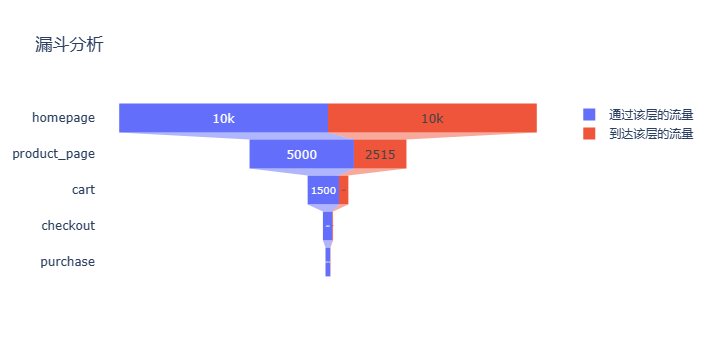

In [8]:
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

fig = go.Figure(go.Funnel(
    y=funnel_stages,
    x=num_users,
    textposition='inside',
    textinfo='value',
    name='通过该层的流量'
))

fig.add_trace(go.Funnel(
    y=funnel_stages,
    x=num_conversions,
    textposition='inside',
    textinfo='value',
    name='到达该层的流量'
))

fig.update_layout(
    title='漏斗分析',
    funnelmode = 'stack'
)

fig.show()

可将鼠标悬停在图表查看详细信息：of initial代表整体转化率，of previous代表环节转化率

## 5. 结论及建议